In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import os

import config

In [55]:
sns.set_theme()

In [56]:
df = pd.read_csv(config.DSSRC)
df_no_wifi = df[df["wifi"] == 0]
df_wifi = df[df["wifi"] != 0]
df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Task 1

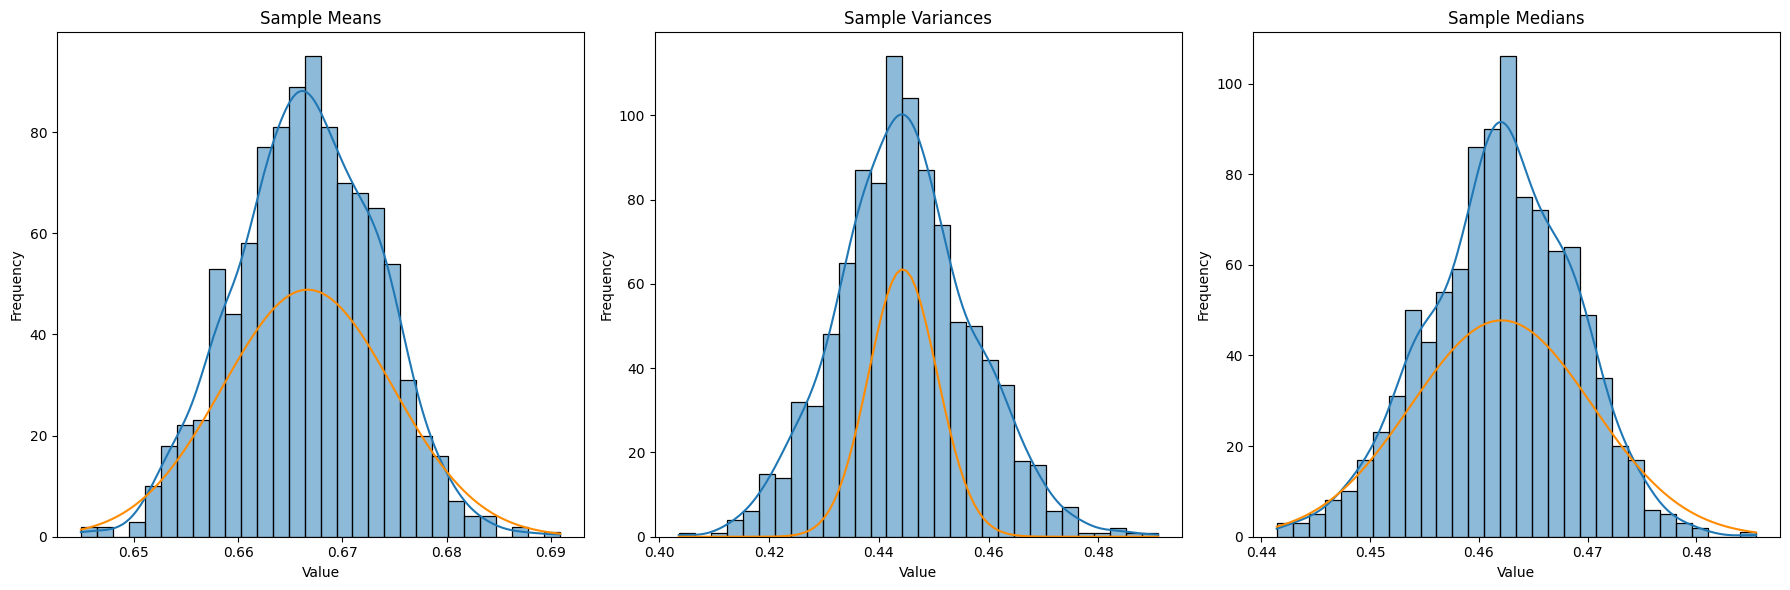

In [16]:
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt


# sample size
n = 10000
# λ = 1/μ
lambda_exp = 1.5


def perform_experiments(n, num_experiments, lambda_exp):
    means = np.zeros(num_experiments)
    variances = np.zeros(num_experiments)
    medians = np.zeros(num_experiments)

    for i in range(num_experiments):
        # generate samples
        sample = np.random.exponential(scale=1/lambda_exp, size=n)
        # calculate stats for each sample
        means[i] = np.mean(sample)
        variances[i] = np.var(sample, ddof=1) 
        medians[i] = np.median(sample)

    return means, variances, medians

# experiments
num_experiments = 1000
sample_means, sample_variances, sample_medians = perform_experiments(n, num_experiments, lambda_exp)

# results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ['Sample Means', 'Sample Variances', 'Sample Medians']
data = [sample_means, sample_variances, sample_medians]
theoretical_dist = [scipy.stats.norm(loc=1/lambda_exp, scale=np.sqrt(1/(n*lambda_exp))),
                    scipy.stats.gamma(a=n/2, scale=2/(n*lambda_exp**2)),
                    scipy.stats.norm(loc=np.log(2)/lambda_exp, scale=np.sqrt(np.pi/(2*n*lambda_exp**2)))]

for i in range(3):
    sns.histplot(data[i], bins=30, kde=True, ax=axes[i])
    
    x = np.linspace(min(data[i]), max(data[i]), 100)
    y = theoretical_dist[i].pdf(x)
    axes[i].plot(x, y, color='darkorange')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

fig.tight_layout()
plt.show()


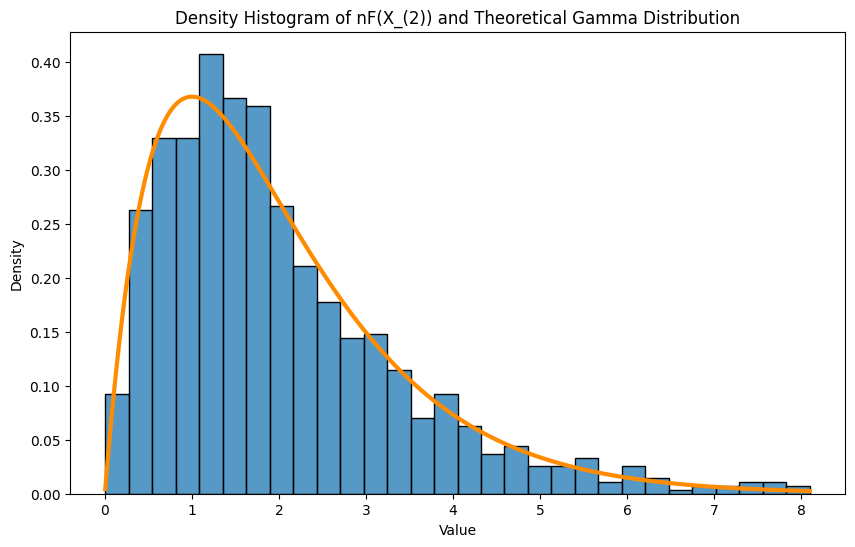

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# params
n = 10000  # sample size
mu = 1    
sigma = 1/1.5
num_experiments = 1000  

def generate_second_order_statistic(sample_size, num_experiments, mu, sigma):
    second_order_stats = np.zeros(num_experiments)
    for i in range(num_experiments):
        sample = np.random.normal(loc=mu, scale=sigma, size=sample_size)
        sample_sorted = np.sort(sample)
        second_order_stat = sample_sorted[1]
        second_order_stats[i] = sample_size * scipy.stats.norm.cdf(second_order_stat, loc=mu, scale=sigma)
    return second_order_stats

# generation
second_order_stats = generate_second_order_statistic(n, num_experiments, mu, sigma)

# theoretical gamma
gamma_dist = scipy.stats.gamma(a=2, scale=1)

# visualisation
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(second_order_stats, bins=30, kde=False, stat='density', ax=ax)
x = np.linspace(min(second_order_stats), max(second_order_stats), 1000)
y = gamma_dist.pdf(x)
ax.plot(x, y, color='darkorange', linewidth=3)
ax.set_title('Density Histogram of nF(X_(2)) and Theoretical Gamma Distribution')
ax.set_xlabel('Value')
ax.set_ylabel('Density')

plt.show()

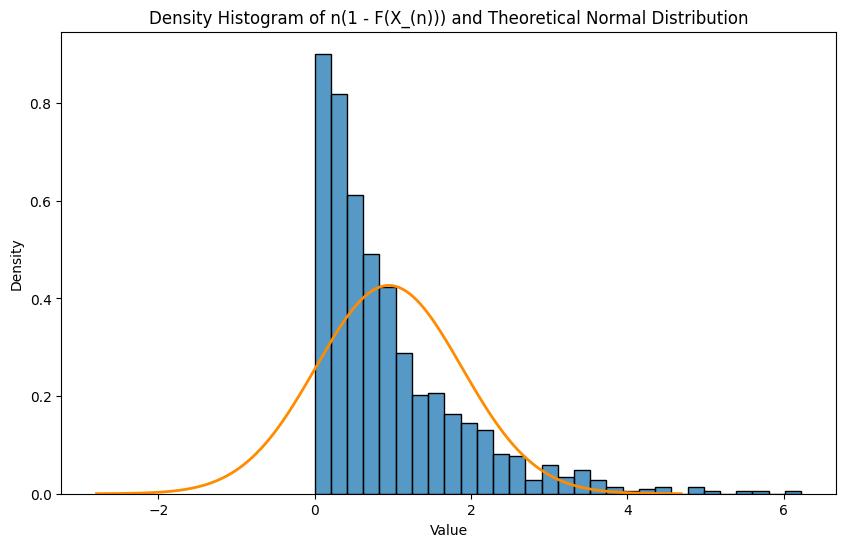

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# params
n = 10000  # sample size
mu = 0    
sigma = 1/1.5
num_experiments = 1000  

def generate_max_statistic(sample_size, num_experiments, mu, sigma):
    max_stats = np.zeros(num_experiments)
    for i in range(num_experiments):
        sample = np.random.normal(loc=mu, scale=sigma, size=sample_size)
        max_value = np.max(sample)
        max_stat = sample_size * (1 - scipy.stats.norm.cdf(max_value, loc=mu, scale=sigma))
        max_stats[i] = max_stat
    return max_stats

# genneration
max_stats = generate_max_statistic(n, num_experiments, mu, sigma)

# theoretical nnormal distribution 
mean_max_stat = np.mean(max_stats)
std_max_stat = np.std(max_stats)
normal_dist = scipy.stats.norm(loc=mean_max_stat, scale=std_max_stat)

# visualisation
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(max_stats, bins=30, kde=False, stat='density', ax=ax)  
x = np.linspace(mean_max_stat - 4*std_max_stat, mean_max_stat + 4*std_max_stat, 1000)
y = normal_dist.pdf(x)
ax.plot(x, y, color='darkorange', linewidth=2)  # normal distribution  
ax.set_title('Density Histogram of n(1 - F(X_(n))) and Theoretical Normal Distribution')
ax.set_xlabel('Value')
ax.set_ylabel('Density')

plt.show()


# Task 2

In [57]:
dictionary_all = {
    "support_dual_sim" : np.count_nonzero(df["dual_sim"],axis=0),
    "support_3g" : np.count_nonzero(df["three_g"], axis=0),
    "n_cores_max" : df["n_cores"].max(),
    "battery_power_mean_average" : df["battery_power"].mean(),
    "battery_power_deviation" : df["battery_power"].std(),
    "battery_power_median" : df["battery_power"].median(),
    "battery_power_quantile_2_5" : df["battery_power"].quantile(2/5)
}

In [58]:
dictionary_no_wifi = {
    "support_dual_sim" : np.count_nonzero(df_no_wifi["dual_sim"],axis=0),
    "support_3g" : np.count_nonzero(df_no_wifi["three_g"], axis=0),
    "n_cores_max" : df_no_wifi["n_cores"].max(),
    "battery_power_mean_average" : df_no_wifi["battery_power"].mean(),
    "battery_power_deviation" : df_no_wifi["battery_power"].std(),
    "battery_power_median" : df_no_wifi["battery_power"].median(),
    "battery_power_quantile_2_5" : df_no_wifi["battery_power"].quantile(2/5)
}

In [59]:
dictionary_wifi = {
    "support_dual_sim" : np.count_nonzero(df_wifi["dual_sim"],axis=0),
    "support_3g" : np.count_nonzero(df_wifi["three_g"], axis=0),
    "n_cores_max" : df_wifi["n_cores"].max(),
    "battery_power_mean_average" : df_wifi["battery_power"].mean(),
    "battery_power_deviation" : df_wifi["battery_power"].std(),
    "battery_power_median" : df_wifi["battery_power"].median(),
    "battery_power_quantile_2_5" : df_wifi["battery_power"].quantile(2/5)
}

In [60]:
dictionary = {
    "all" : dictionary_all,
    "no_wifi" : dictionary_no_wifi,
    "wifi" : dictionary_wifi
}

In [61]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

json_dict = json.dumps(dictionary, indent=2, cls=NpEncoder)
with open(config.OUTSRC, "w") as outfile:
    outfile.write(json_dict)

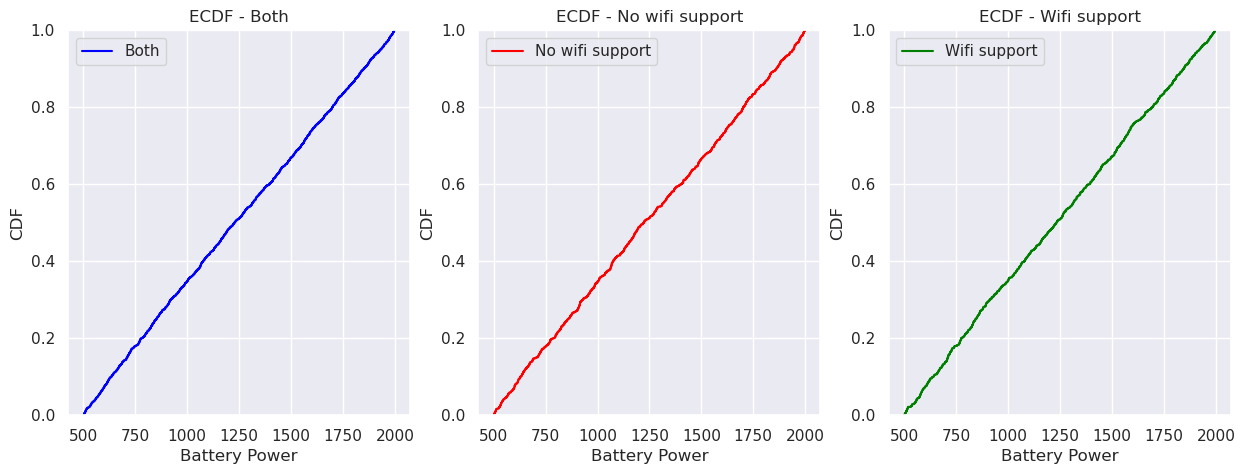

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.ecdfplot(df['battery_power'], ax=ax[0], color='blue', label='Both', linestyle='-')
ax[0].set_title('ECDF - Both')
ax[0].set_xlabel('Battery Power')
ax[0].set_ylabel('CDF')
ax[0].legend()

sns.ecdfplot(df_no_wifi['battery_power'], ax=ax[1], color='red', label='No wifi support', linestyle='-')
ax[1].set_title('ECDF - No wifi support')
ax[1].set_xlabel('Battery Power')
ax[1].set_ylabel('CDF')
ax[1].legend()

sns.ecdfplot(df_wifi['battery_power'], ax=ax[2], color='green', label='Wifi support', linestyle='-')
ax[2].set_title('ECDF - Wifi support')
ax[2].set_xlabel('Battery Power')
ax[2].set_ylabel('CDF')
ax[2].legend()

plt.show()

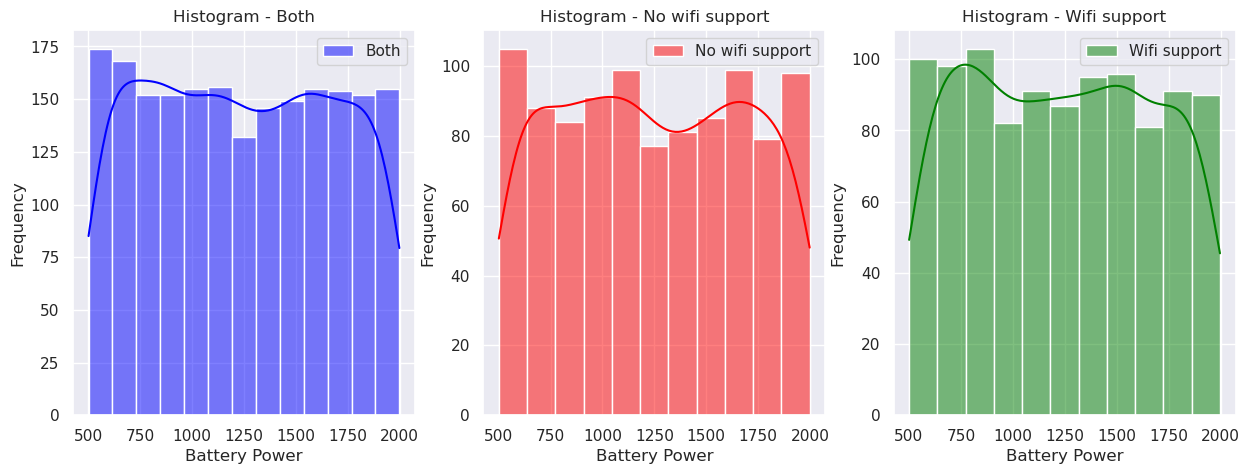

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['battery_power'], ax=ax[0], color='blue', label='Both', kde=True)
ax[0].set_title('Histogram - Both')
ax[0].set_xlabel('Battery Power')
ax[0].set_ylabel('Frequency')
ax[0].legend()

sns.histplot(df_no_wifi['battery_power'], ax=ax[1], color='red', label='No wifi support', kde=True)
ax[1].set_title('Histogram - No wifi support')
ax[1].set_xlabel('Battery Power')
ax[1].set_ylabel('Frequency')
ax[1].legend()

sns.histplot(df_wifi['battery_power'], ax=ax[2], color='green', label='Wifi support', kde=True)
ax[2].set_title('Histogram - Wifi support')
ax[2].set_xlabel('Battery Power')
ax[2].set_ylabel('Frequency')
ax[2].legend()

plt.show()

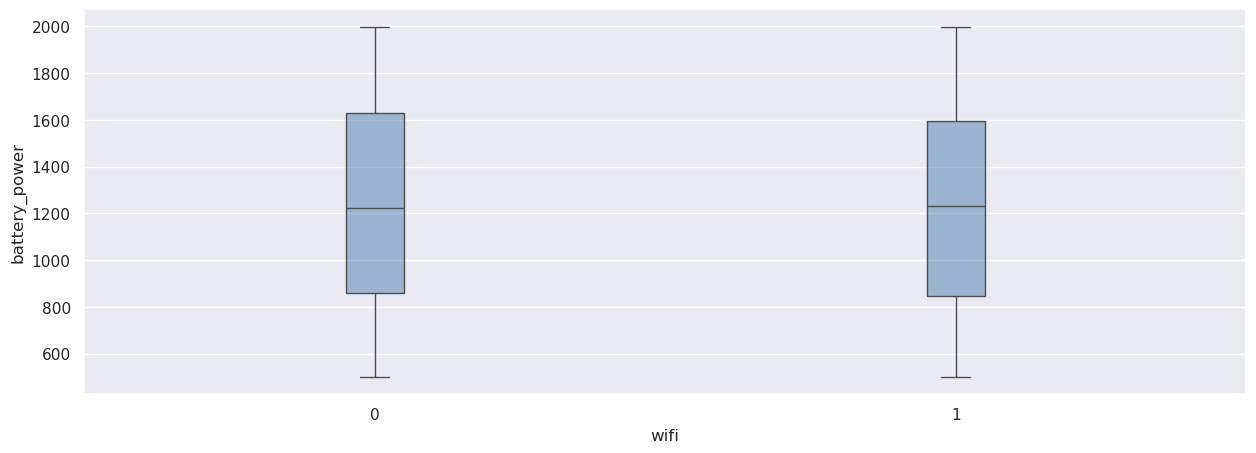

In [64]:

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax = sns.boxplot(data=df,x="wifi" ,y="battery_power", width=0.1, boxprops={"facecolor": (.3, .5, .7, .5)})
plt.show()